In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

np.random.seed(0)

# Generate Synthetic Dataset with 5 Classes
def generate_dataset(n_samples=1000, n_features=2, n_classes=5):
    X = []
    Y = []
    samples_per_class = n_samples // n_classes
    
    for class_idx in range(n_classes):
        angle = 2 * np.pi * class_idx / n_classes
        center_x = 4 * np.cos(angle)
        center_y = 4 * np. sin(angle)
        
        class_samples = np.random.randn(samples_per_class, n_features) * 0.5
        class_samples[:, 0] += center_x
        class_samples[:, 1] += center_y
        
        X.append(class_samples)
        Y.append(np.full(samples_per_class, class_idx))
    
    X = np.vstack(X)
    Y = np. concatenate(Y)
    
    indices = np.random. permutation(len(X))
    X = X[indices]
    Y = Y[indices]
    
    return X, Y

X, Y = generate_dataset(n_samples=500, n_features=2, n_classes=5)

DATASET INFORMATION
X shape: (500, 2)
Y shape: (500,)
Classes: [0 1 2 3 4]


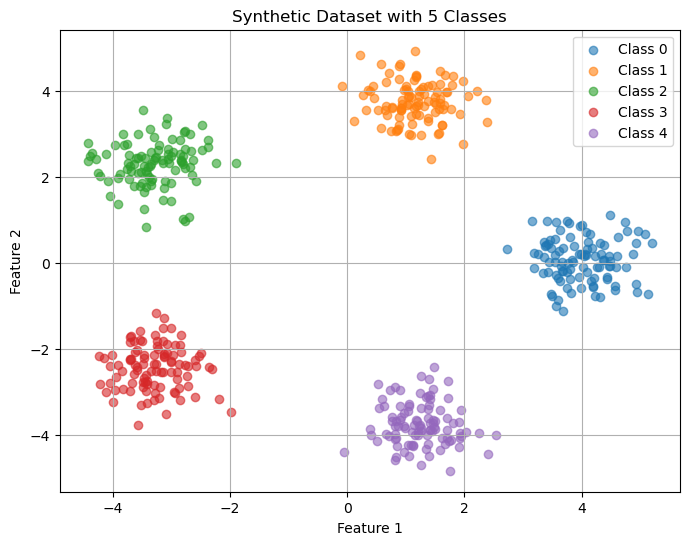

In [2]:
print("DATASET INFORMATION")
print(f"X shape: {X. shape}")
print(f"Y shape: {Y.shape}")
print(f"Classes: {np.unique(Y)}")

# Visualize Dataset
plt.figure(figsize=(8, 6))
for i in range(5):
    mask = Y == i
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Class {i}', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt. title('Synthetic Dataset with 5 Classes')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
import os

# Create a DataFrame
df = pd. DataFrame({
    'Feature1': X[:, 0],
    'Feature2': X[:, 1],
    'Class': Y
})

# Save to current directory
current_dir = os. getcwd()
df.to_csv(os.path.join(current_dir, 'dataset.csv'), index=False)
print(f"Dataset saved to: {os.path.join(current_dir, 'dataset.csv')}")

Dataset saved to: /mnt/c/Users/ASUS/OneDrive - American International University-Bangladesh/AIUB PDF/AIUB PDF/Semester 10(Fall)/MID/CVPR_Project/CVPR/MID/dataset.csv


In [4]:
df.head()

,Feature1,Feature2,Class
0,-2.572177,-2.401782,3
1,3.980359,-0.584047,0
2,1.918334,3.459501,1
3,-3.959335,2.751290,2
4,2.365722,3.783097,1


In [5]:
def one_hot_encode(Y, n_classes):
   
    one_hot = np. zeros((Y.shape[0], n_classes))
    one_hot[np. arange(Y. shape[0]), Y. astype(int)] = 1
    return one_hot

# Train-Test Split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# One-hot encode labels
Y_train_encoded = one_hot_encode(Y_train, 5)
Y_test_encoded = one_hot_encode(Y_test, 5)

# Normalize the data 
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train_norm = (X_train - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std

print("DATA PREPROCESSING")

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Features normalized: Mean={X_mean}, Std={X_std}")

DATA PREPROCESSING
Training samples: 400
Testing samples: 100
Features normalized: Mean=[ 0.00267785 -0.03091168], Std=[2.88887972 2.85139096]


In [6]:
class NeuralNetwork(object):
    def __init__(self):
      
        # Architecture Configuration
        self.input_size = 2
        self.hidden_size_1 = 16
        self.hidden_size_2 = 16
        self.hidden_size_3 = 16
        self. output_size = 5
        
        self.learning_rate = 0.01
        
        # He Initialization: W * sqrt(2 / n_inputs)
        # Better for ReLU activation
        self.W1 = np. random.randn(self.input_size, self. hidden_size_1) * np.sqrt(2.0 / self.input_size)
        self.b1 = np. zeros((1, self.hidden_size_1))
        
        self.W2 = np.random.randn(self.hidden_size_1, self.hidden_size_2) * np.sqrt(2.0 / self.hidden_size_1)
        self.b2 = np.zeros((1, self.hidden_size_2))
        
        self.W3 = np.random.randn(self.hidden_size_2, self.hidden_size_3) * np.sqrt(2.0 / self. hidden_size_2)
        self. b3 = np.zeros((1, self.hidden_size_3))
        
        self.W4 = np. random.randn(self.hidden_size_3, self. output_size) * np.sqrt(2.0 / self.hidden_size_3)
        self.b4 = np.zeros((1, self.output_size))

    def relu(self, z, der=False):
       
        if der:
            return np.where(z > 0, 1, 0)
        return np.maximum(0, z)

    def softmax(self, z):
        
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np. sum(exp_scores, axis=1, keepdims=True)

    def feedForward(self, X):
       
        # Layer 1: Input -> Hidden1
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self. relu(self.z1)
        
        # Layer 2: Hidden1 -> Hidden2
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        
        # Layer 3: Hidden2 -> Hidden3
        self. z3 = np.dot(self. a2, self. W3) + self.b3
        self.a3 = self.relu(self.z3)
        
        # Output Layer: Hidden3 -> Output (Softmax)
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.output_probs = self. softmax(self. z4)
        
        return self.output_probs
        
    def backPropagation(self, X, Y, output_probs):
        
        m = X.shape[0]
        
        # Output Layer Error
        dz4 = output_probs - Y
        dw4 = (1/m) * np.dot(self. a3.T, dz4)
        db4 = (1/m) * np.sum(dz4, axis=0, keepdims=True)
        
        # Layer 3 Error
        da3 = np. dot(dz4, self.W4.T)
        dz3 = da3 * self.relu(self. z3, der=True)
        dw3 = (1/m) * np.dot(self.a2.T, dz3)
        db3 = (1/m) * np.sum(dz3, axis=0, keepdims=True)
        
        # Layer 2 Error
        da2 = np.dot(dz3, self.W3.T)
        dz2 = da2 * self.relu(self.z2, der=True)
        dw2 = (1/m) * np. dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # Layer 1 Error
        da1 = np. dot(dz2, self.W2.T)
        dz1 = da1 * self.relu(self. z1, der=True)
        dw1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        # Update Weights and Biases (Gradient Descent)
        self.W4 -= self.learning_rate * dw4
        self. b4 -= self.learning_rate * db4
        self.W3 -= self.learning_rate * dw3
        self.b3 -= self.learning_rate * db3
        self.W2 -= self. learning_rate * dw2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dw1
        self.b1 -= self. learning_rate * db1

    def compute_loss(self, Y_true, Y_pred):
       
        m = Y_true.shape[0]
        Y_pred = np. clip(Y_pred, 1e-15, 1 - 1e-15)
        log_likelihood = -np.log(Y_pred[range(m), np.argmax(Y_true, axis=1)])
        loss = np. sum(log_likelihood) / m
        return loss

    def train(self, X, Y, epochs=5000):
        """Train the network for specified epochs."""
        loss_history = []
        acc_history = []
        
        for i in range(epochs):
            output = self.feedForward(X)
            self.backPropagation(X, Y, output)
            
            if i % 100 == 0:
                loss = self.compute_loss(Y, output)
                acc = np.mean(np. argmax(output, axis=1) == np.argmax(Y, axis=1))
                loss_history.append(loss)
                acc_history.append(acc)
                
            if (i + 1) % 100 == 0:
                print(f"Epoch {i+1}/{epochs} - Loss: {loss:.4f} - Accuracy: {acc*100:.2f}%")
                
        return loss_history, acc_history

    def predict(self, X):
        """Return predicted class labels."""
        probs = self.feedForward(X)
        return np.argmax(probs, axis=1)


TRAINING NEURAL NETWORK
Architecture: 2 -> 16 -> 16 -> 16 -> 5
Learning Rate: 0.01
Epochs: 5000
------------------------------------------------------------
Epoch 100/5000 - Loss: 1.8930 - Accuracy: 16.25%
Epoch 200/5000 - Loss: 0.4154 - Accuracy: 98.50%
Epoch 300/5000 - Loss: 0.1394 - Accuracy: 100.00%
Epoch 400/5000 - Loss: 0.0651 - Accuracy: 100.00%
Epoch 500/5000 - Loss: 0.0395 - Accuracy: 100.00%


Epoch 600/5000 - Loss: 0.0275 - Accuracy: 100.00%
Epoch 700/5000 - Loss: 0.0207 - Accuracy: 100.00%
Epoch 800/5000 - Loss: 0.0164 - Accuracy: 100.00%
Epoch 900/5000 - Loss: 0.0135 - Accuracy: 100.00%
Epoch 1000/5000 - Loss: 0.0114 - Accuracy: 100.00%
Epoch 1100/5000 - Loss: 0.0098 - Accuracy: 100.00%
Epoch 1200/5000 - Loss: 0.0086 - Accuracy: 100.00%
Epoch 1300/5000 - Loss: 0.0076 - Accuracy: 100.00%
Epoch 1400/5000 - Loss: 0.0068 - Accuracy: 100.00%
Epoch 1500/5000 - Loss: 0.0062 - Accuracy: 100.00%
Epoch 1600/5000 - Loss: 0.0056 - Accuracy: 100.00%
Epoch 1700/5000 - Loss: 0.0051 - Accuracy: 100.00%
Epoch 1800/5000 - Loss: 0.0047 - Accuracy: 100.00%
Epoch 1900/5000 - Loss: 0.0044 - Accuracy: 100.00%
Epoch 2000/5000 - Loss: 0.0041 - Accuracy: 100.00%
Epoch 2100/5000 - Loss: 0.0038 - Accuracy: 100.00%
Epoch 2200/5000 - Loss: 0.0036 - Accuracy: 100.00%
Epoch 2300/5000 - Loss: 0.0034 - Accuracy: 100.00%
Epoch 2400/5000 - Loss: 0.0032 - Accuracy: 100.00%
Epoch 2500/5000 - Loss: 0.0030 - Ac

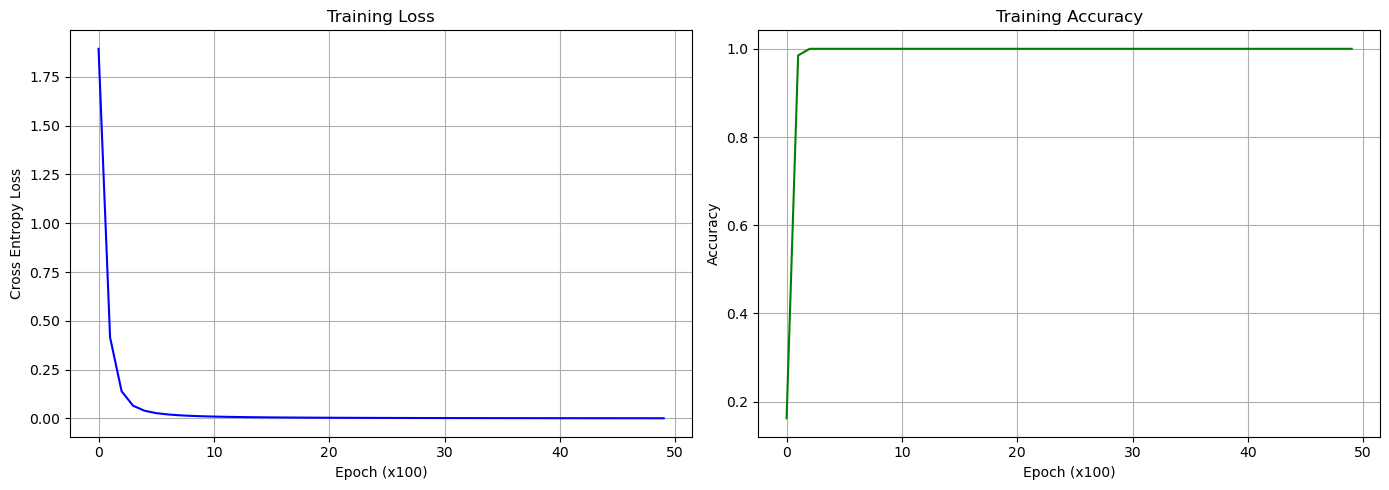

In [7]:

print("TRAINING NEURAL NETWORK")

print(f"Architecture: 2 -> 16 -> 16 -> 16 -> 5")
print(f"Learning Rate: 0.01")
print(f"Epochs: 5000")
print("-"*60)

NN = NeuralNetwork()
loss_history, acc_history = NN.train(X_train_norm, Y_train_encoded, epochs=5000)

# Plot Training Metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(loss_history, color='blue')
axes[0].set_xlabel('Epoch (x100)')
axes[0].set_ylabel('Cross Entropy Loss')
axes[0].set_title('Training Loss')
axes[0]. grid(True)

axes[1].plot(acc_history, color='green')
axes[1].set_xlabel('Epoch (x100)')
axes[1].set_ylabel('Accuracy')
axes[1]. set_title('Training Accuracy')
axes[1].grid(True)

plt. tight_layout()
plt.show()


In [8]:


print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

# Predictions
Y_train_pred = NN.predict(X_train_norm)
Y_test_pred = NN.predict(X_test_norm)

# Training Metrics
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")

# Testing Metrics
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

# Per-Class Metrics
print("\n" + "-"*60)
print("PER-CLASS METRICS")
print("-"*60)

precision_per_class = precision_score(Y_test, Y_test_pred, average=None)
recall_per_class = recall_score(Y_test, Y_test_pred, average=None)
f1_per_class = f1_score(Y_test, Y_test_pred, average=None)

for i in range(5):
    print(f"Class {i}: Precision={precision_per_class[i]:.4f}, Recall={recall_per_class[i]:.4f}, F1={f1_per_class[i]:.4f}")


MODEL EVALUATION

Training Accuracy: 100.00%

Test Accuracy: 100.00%
Test Precision: 1.0000
Test Recall: 1.0000
Test F1-Score: 1.0000

------------------------------------------------------------
PER-CLASS METRICS
------------------------------------------------------------
Class 0: Precision=1.0000, Recall=1.0000, F1=1.0000
Class 1: Precision=1.0000, Recall=1.0000, F1=1.0000
Class 2: Precision=1.0000, Recall=1.0000, F1=1.0000
Class 3: Precision=1.0000, Recall=1.0000, F1=1.0000
Class 4: Precision=1.0000, Recall=1.0000, F1=1.0000


In [9]:
# Classification Report
print("CLASSIFICATION REPORT")

print(classification_report(Y_test, Y_test_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        20
     Class 1       1.00      1.00      1.00        20
     Class 2       1.00      1.00      1.00        21
     Class 3       1.00      1.00      1.00        21
     Class 4       1.00      1.00      1.00        18

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



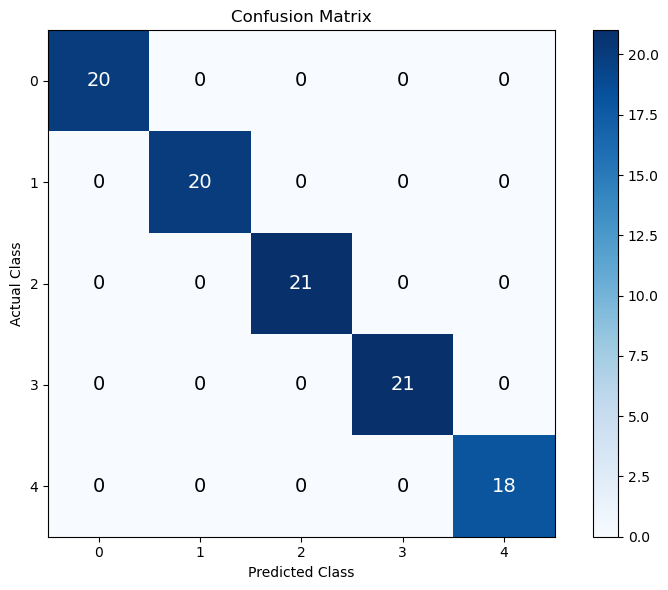


Confusion Matrix:
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 18]]


In [10]:


cm = confusion_matrix(Y_test, Y_test_pred)

plt.figure(figsize=(8, 6))
plt. imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(5):
    for j in range(5):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black', fontsize=14)

plt. xticks(range(5))
plt.yticks(range(5))
plt.tight_layout()
plt. show()

print("\nConfusion Matrix:")
print(cm)


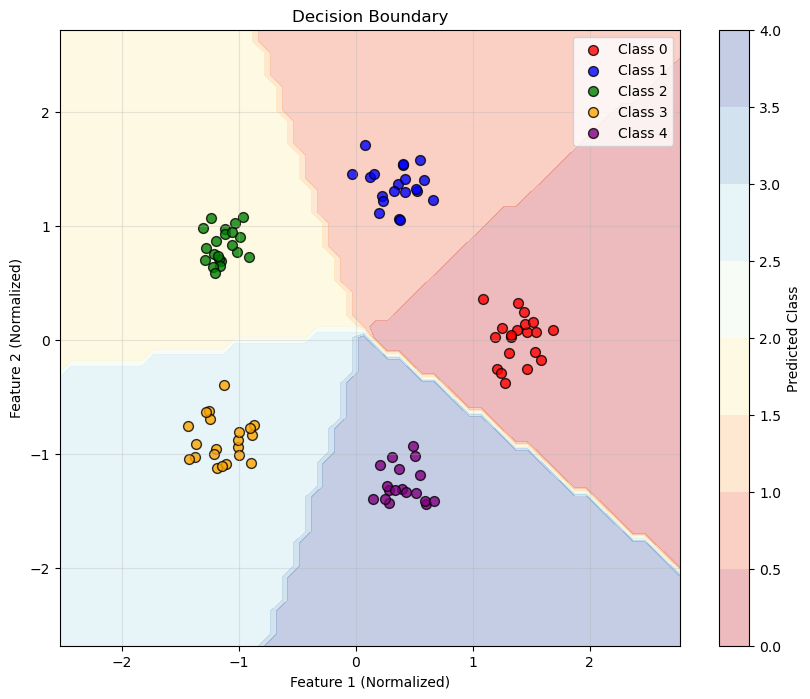

In [11]:


plt.figure(figsize=(10, 8))

h = 0.1
x_min, x_max = X_train_norm[:, 0]. min() - 1, X_train_norm[:, 0].max() + 1
y_min, y_max = X_train_norm[:, 1]. min() - 1, X_train_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.colorbar(label='Predicted Class')

colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(5):
    mask = Y_test == i
    plt.scatter(X_test_norm[mask, 0], X_test_norm[mask, 1],
               c=colors[i], label=f'Class {i}', alpha=0.8, edgecolors='black', s=50)

plt.xlabel('Feature 1 (Normalized)')
plt. ylabel('Feature 2 (Normalized)')
plt.title('Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)
plt. show()


In [12]:

print("HYPERPARAMETER COMPARISON")


configs = [
    {'lr': 0.001, 'epochs': 5000},
    {'lr': 0.01, 'epochs': 5000},
    {'lr': 0.1, 'epochs': 5000},
]

results = []

for config in configs:
    np.random.seed(0)
    nn_temp = NeuralNetwork()
    nn_temp.learning_rate = config['lr']
    
    loss_hist, _ = nn_temp. train(X_train_norm, Y_train_encoded, epochs=config['epochs'])
    y_pred_temp = nn_temp.predict(X_test_norm)
    acc_temp = accuracy_score(Y_test, y_pred_temp)
    
    results.append({
        'Learning Rate': config['lr'],
        'Epochs': config['epochs'],
        'Final Loss': loss_hist[-1],
        'Accuracy': acc_temp * 100
    })
    print(f"LR={config['lr']}: Accuracy={acc_temp*100:.2f}%")

print("\nComparison Table:")
results_df = pd. DataFrame(results)
print(results_df.to_string(index=False))


HYPERPARAMETER COMPARISON
Epoch 100/5000 - Loss: 1.3065 - Accuracy: 54.25%
Epoch 200/5000 - Loss: 1.0779 - Accuracy: 68.25%
Epoch 300/5000 - Loss: 0.9405 - Accuracy: 76.50%
Epoch 400/5000 - Loss: 0.8438 - Accuracy: 93.00%
Epoch 500/5000 - Loss: 0.7656 - Accuracy: 98.00%
Epoch 600/5000 - Loss: 0.6990 - Accuracy: 98.75%
Epoch 700/5000 - Loss: 0.6406 - Accuracy: 99.25%
Epoch 800/5000 - Loss: 0.5888 - Accuracy: 99.50%
Epoch 900/5000 - Loss: 0.5423 - Accuracy: 99.50%
Epoch 1000/5000 - Loss: 0.4998 - Accuracy: 99.75%
Epoch 1100/5000 - Loss: 0.4607 - Accuracy: 99.75%
Epoch 1200/5000 - Loss: 0.4245 - Accuracy: 99.75%
Epoch 1300/5000 - Loss: 0.3908 - Accuracy: 100.00%
Epoch 1400/5000 - Loss: 0.3594 - Accuracy: 100.00%
Epoch 1500/5000 - Loss: 0.3301 - Accuracy: 100.00%
Epoch 1600/5000 - Loss: 0.3029 - Accuracy: 100.00%
Epoch 1700/5000 - Loss: 0.2778 - Accuracy: 100.00%
Epoch 1800/5000 - Loss: 0.2546 - Accuracy: 100.00%
Epoch 1900/5000 - Loss: 0.2332 - Accuracy: 100.00%
Epoch 2000/5000 - Loss: 0.

# conclution
    

In this assignment, I implemented a fully connected neural network from scratch using NumPy to perform 5-class classification on a synthetic 2D dataset. The model used three hidden layers with ReLU activation and a softmax output layer, trained with categorical cross-entropy loss on z-score normalized features and one-hot encoded labels.

The network showed good convergence over 5000 epochs, achieving high training and test accuracy of 100%, as confirmed by overall metrics, per-class scores, and the confusion matrix. A decision boundary plot demonstrated that the model learned clear separation between the five classes. Hyperparameter experiments with different learning rates highlighted how too small a rate slows learning and too large a rate reduces stability, with 0.01 performing best.

Key challenges included implementing correct backpropagation through multiple layers, handling numerical stability in softmax and loss computation, and managing array shapes. These were addressed with careful gradient calculations, clipping, and stability tricks. Overall, the work shows that a manually implemented neural network using only NumPy can successfully solve a multi-class classification problem, with clear scope for future improvements such as better optimizers, regularization,Implement learning rate decay,Increase network depth or width and testing on more complex datasets.